In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from glob import glob
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Rawdata analysis

In [2]:
def read_rawdata(filename):
    with open(filename, "r") as F:
        lines = F.readlines()
        xpos = np.array([float(x) for x in lines[0].split(",")[1:]])
        ypos = np.array([float(x) for x in lines[1].split(",")[1:]])
        print(xpos,)
        print(ypos,)
        angl = np.array([float(x) for x in lines[2].split(",")[1:]])
        print(angl,)
        

        # Convert each string into a list of values
        data = [s.split(",") for s in lines[4:]]

        # Convert to DataFrame
        df = pd.DataFrame(data, dtype=float)
        return xpos, ypos, angl, df
        
        
xpos, ypos, angle, df = read_rawdata("Fujitok_Subaru_MB413_Data_Pack_WO_rawdata.csv")
df

[ 30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7 252.1  30.5  85.9
 141.3 196.7  30.5  85.9 141.3  30.5  85.9  30.5  85.9 141.3 196.7 252.1
  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7  30.5  85.9 141.3
  30.5  85.9  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7 252.1
  30.5  85.9 141.3 196.7  30.5  85.9 141.3  30.5  85.9  30.5  85.9 141.3
 196.7 252.1  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3 196.7  30.5
  85.9 141.3  30.5  85.9  30.5  85.9 141.3 196.7 252.1  30.5  85.9 141.3
 196.7 252.1  30.5  85.9 141.3 196.7  30.5  85.9 141.3  30.5  85.9]
[ 30.5  30.5  30.5  30.5  30.5  85.9  85.9  85.9  85.9  85.9 141.3 141.3
 141.3 141.3 196.7 196.7 196.7 252.1 252.1  30.5  30.5  30.5  30.5  30.5
  85.9  85.9  85.9  85.9  85.9 141.3 141.3 141.3 141.3 196.7 196.7 196.7
 252.1 252.1  30.5  30.5  30.5  30.5  30.5  85.9  85.9  85.9  85.9  85.9
 141.3 141.3 141.3 141.3 196.7 196.7 196.7 252.1 252.1  30.5  30.5  30.5
  30.5  30.5  85.9  85.9  85.9  85.9  85.9 141.3 141.3 1

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,390.0,0.001506,-0.002326,-0.001605,0.001480,0.001491,-0.002222,-0.004446,-0.008318,0.001474,...,-0.006255,0.002503,0.003918,0.004181,0.001569,-0.000321,0.001635,0.001639,0.002232,-1.244632e-03
1,390.1,0.001506,-0.001363,-0.002021,0.001480,0.001491,-0.001503,-0.004260,-0.002374,-0.003802,...,-0.001192,0.002477,0.002268,0.002110,0.003137,0.001357,0.002639,0.002645,-0.001754,-6.521631e-03
2,390.2,0.001506,0.001785,0.001652,0.001480,0.001491,0.001783,-0.007578,-0.006801,0.000042,...,-0.000940,0.000426,0.001885,0.002236,0.001577,0.002142,0.002342,0.002347,-0.002122,-1.732199e-03
3,390.3,0.000062,-0.005987,-0.004422,0.001480,0.001491,-0.005775,0.002537,-0.003238,0.002033,...,0.000374,0.002743,0.000512,0.000153,0.000021,0.001665,0.000227,0.000227,-0.004819,-1.118710e-03
4,390.4,-0.003695,-0.005209,-0.006372,-0.004204,0.001491,-0.005491,-0.000606,0.004041,-0.009179,...,0.002033,0.003118,0.002079,0.002376,0.004746,0.002653,0.003182,0.003189,-0.003381,-9.571980e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,439.6,0.000711,-0.002125,-0.002526,0.001808,-0.000220,-0.002227,0.001649,0.001651,-0.003618,...,-0.002958,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.001354,1.807358e-03
497,439.7,-0.003615,0.001012,0.000712,-0.003693,0.000428,0.000969,0.001649,0.001651,-0.001249,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.000489,-2.966509e-03
498,439.8,-0.001160,0.001621,0.001699,-0.000741,0.001795,0.001656,0.001649,0.001651,0.001624,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,0.001092,-1.765200e-04
499,439.9,-0.003602,0.001496,0.001446,-0.003881,0.000322,0.001506,0.001649,0.001651,0.001428,...,0.000149,0.000149,0.000149,0.000148,0.000148,0.000150,0.000148,0.000149,-0.001428,1.485670e-04


# Calculated data analysis

In [2]:
def get_flux(filter_x, filter_y, flux_x, flux_y, plot=False, ax1=None, ax2=None):
    f1 = interp1d(filter_x, filter_y)
    f2 = interp1d(flux_x, flux_y)
    xmin = np.amax([filter_x.min(), flux_x.min()])
    xmax = np.amin([filter_x.max(), flux_x.max()])
    x = np.linspace(xmin, xmax, 1000)
    flux = np.dot(f1(x), f2(x))/np.sum(f1(x))
    if plot:
        ax1.plot(filter_x, filter_y, "k-")
        ax2.plot(flux_x, flux_y, "r-")
        plt.xlim(xmin, xmax)
    return flux

def get_mag(filter_x, filter_y, flux_x, flux_y, plot=False, ax1=None, ax2=None):
    flux = get_flux(filter_x, filter_y, flux_x, flux_y, plot=plot, ax1=ax1, ax2=ax2)
    mag = -2.5*np.log10(flux)-48.2
    return mag

In [39]:
def read_calcdata(filename):
    df = pd.read_csv(filename)
    return df

flist = np.sort(glob("Fujitok*calculated.csv"))
ifilt = 0

df = pd.read_csv(flist[ifilt])
df

,Wavelength,"30.5, 30.5","85.9, 30.5","141.3, 30.5","196.7, 30.5","252.1, 30.5","30.5, 85.9","85.9, 85.9","141.3, 85.9","196.7, 85.9","252.1, 85.9","30.5, 141.3","85.9, 141.3","141.3, 141.3","196.7, 141.3","30.5, 196.7","85.9, 196.7","141.3, 196.7","30.5, 252.1","85.9, 252.1"
0,390.0,0.0015,0.0017,0.0017,0.0013,0.0027,0.0018,0.0010,0.0010,0.0020,0.0003,0.0017,0.0024,0.0017,0.0002,0.0033,0.0004,-0.0003,0.0035,0.0031
1,390.1,0.0021,-0.0007,-0.0009,0.0005,0.0029,-0.0006,-0.0004,-0.0003,-0.0005,0.0004,-0.0005,-0.0005,0.0002,0.0018,0.0008,0.0016,0.0022,0.0030,0.0008
2,390.2,-0.0008,0.0012,0.0014,0.0004,0.0010,0.0009,0.0009,0.0008,0.0004,0.0035,0.0004,0.0006,0.0006,0.0001,0.0020,0.0003,-0.0004,0.0029,0.0002
3,390.3,0.0027,0.0017,0.0022,0.0027,0.0014,0.0015,-0.0004,-0.0003,0.0017,0.0018,0.0018,0.0007,0.0003,0.0009,0.0009,0.0009,0.0018,0.0004,0.0034
4,390.4,0.0004,0.0012,0.0006,0.0008,0.0026,0.0016,-0.0022,-0.0021,0.0019,0.0019,0.0017,-0.0017,-0.0004,0.0013,0.0026,0.0012,0.0006,0.0002,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,439.6,0.0006,0.0002,0.0002,0.0009,0.0000,0.0002,0.0004,0.0004,0.0001,-0.0006,0.0001,0.0004,0.0004,0.0002,0.0006,0.0003,0.0014,0.0005,-0.0005
497,439.7,0.0010,0.0004,0.0004,0.0013,-0.0001,0.0004,0.0004,0.0004,0.0003,-0.0002,0.0003,0.0004,0.0004,0.0002,0.0011,0.0002,0.0014,0.0000,-0.0006
498,439.8,0.0008,0.0004,0.0004,0.0003,-0.0007,0.0004,0.0004,0.0004,0.0004,0.0006,0.0005,0.0004,0.0004,0.0002,0.0010,0.0002,0.0014,-0.0008,-0.0001
499,439.9,0.0001,0.0004,0.0004,0.0001,-0.0003,0.0004,0.0004,0.0004,0.0004,0.0005,0.0004,0.0004,0.0004,0.0004,0.0003,0.0004,0.0015,0.0003,0.0002


In [40]:
dfs = []
for ifilt in range(len(flist)):
    df = pd.read_csv(flist[ifilt])
    dfs.append(df)

In [41]:
#i = 3
#dfs[i]["Wavelength"]-np.mean(dfs[i]["Wavelength"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.


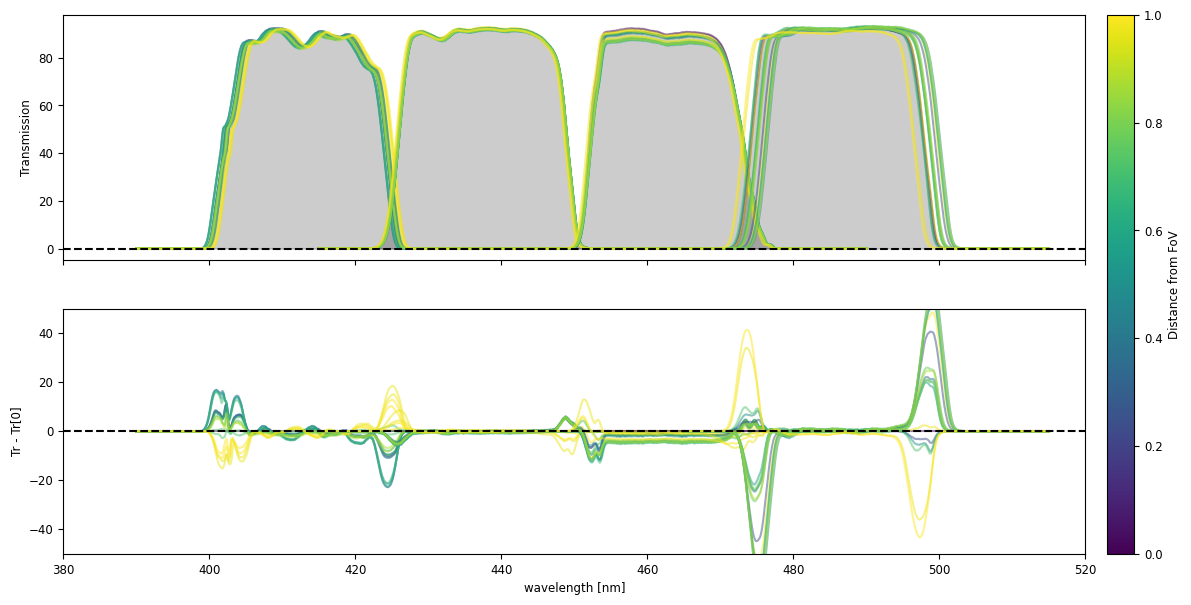

In [71]:
def k2dist(k):
    items = np.array(k.split(", ")).astype(float)-30.5
    dist = np.sqrt(np.sum(items**2))/228.43
    return dist

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.viridis

"""
plt.figure(figsize=(12,5))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
        print (dist)
    plt.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
plt.axhline(y=0, color="k", ls="--")
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
plt.colorbar(sm, label="distance from the FoV center")
plt.xlabel("wavelength [nm]")
plt.show()

plt.figure(figsize=(12,2))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k]-df["30.5, 30.5"], "r-", alpha=0.5, color=cmap(norm(dist)))
plt.axhline(y=0, color="k", ls="--")
#sm = cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([]) 
#plt.colorbar(sm, label="distance from the FoV center")
plt.xlabel("wavelength [nm]")
plt.show()
"""

fig, (ax1, ax2) = plt.subplots(
    2, 1,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 2]},
    figsize=(15, 7)
)

for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        ax1.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
        #print (dist)
    ax1.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
ax1.axhline(y=0, color="k", ls="--")

#ax1.axvline(x=557.4, color="b")
#ax1.axvline(x=558.2, color="b")

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
#ax1.colorbar(sm, label="distance from the FoV center")

for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        ax2.plot(df["Wavelength"], df[k]-df["30.5, 30.5"], "r-", alpha=0.5, color=cmap(norm(dist)))
ax2.axhline(y=0, color="k", ls="--")



# プロット（例として imshow）
#im1 = ax1.imshow(Z1, aspect='auto', origin='lower', extent=[0,10,0,5])
#im2 = ax2.imshow(Z2, aspect='auto', origin='lower', extent=[0,10,0,5])

# 共通 colorbar（2つのAxをまとめて指定）
fig.subplots_adjust(right=0.85)  # 0.85〜0.9くらいで調整
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', fraction=0.04, pad=0.02)
cbar.set_label("Distance from FoV")

ax1.set_ylabel("Transmission")
ax2.set_ylabel("Tr - Tr[0]")
ax2.set_xlabel("wavelength [nm]")
ax2.set_ylim(-50,50)

ax1.set_xlim(380,520)
ax2.set_xlim(380,520)

plt.show()

In [43]:
lbgs = np.loadtxt("../lbg_z3.txt")

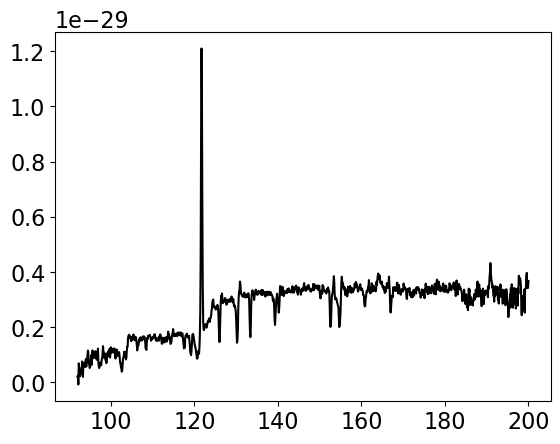

In [44]:
z = 0
wl = lbgs[:,0]/10*(1+z)
fl = lbgs[:,1]
plt.plot(wl, fl, "k-")

In [45]:
ifilt = 2
df = pd.read_csv(flist[ifilt])

0 25.703661618286716
0 25.684993132465948


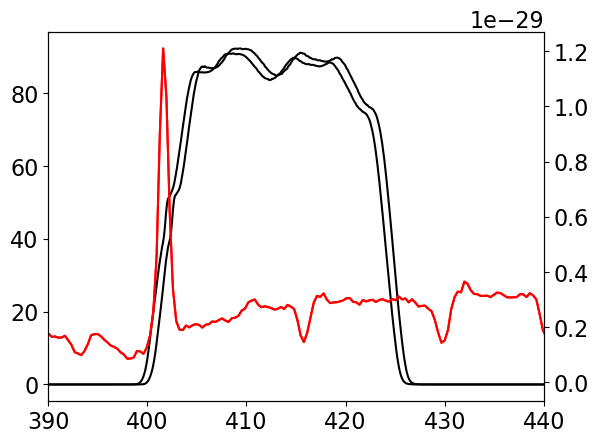

0 26.303762012401947
0 26.32626581719957


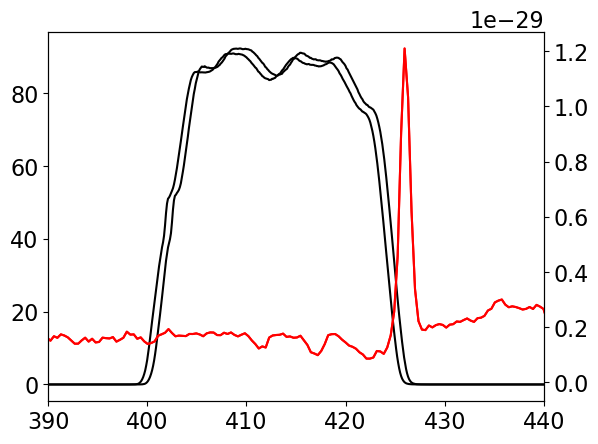

1 25.672544355258722
1 25.68027733285129


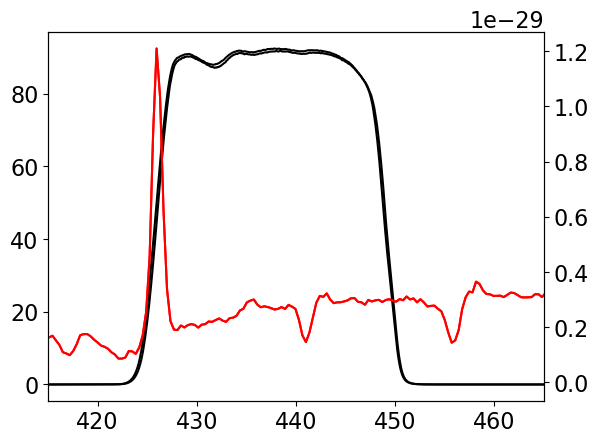

1 26.302709981735248
1 26.29509143437454


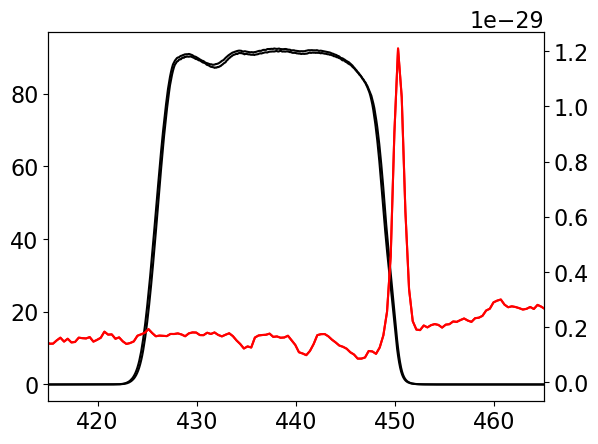

2 25.77560327279788
2 25.77201764721677


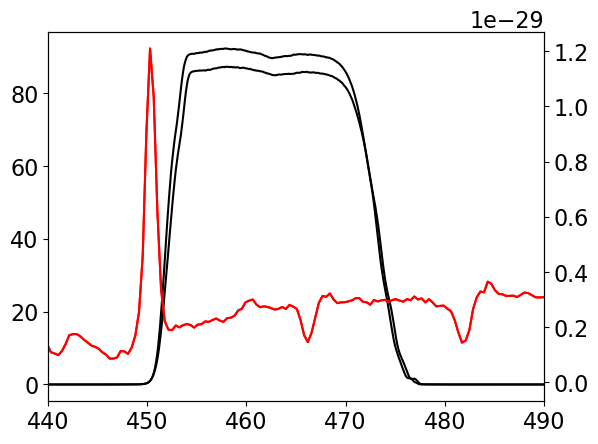

2 26.284472144223855
2 26.263621546453763


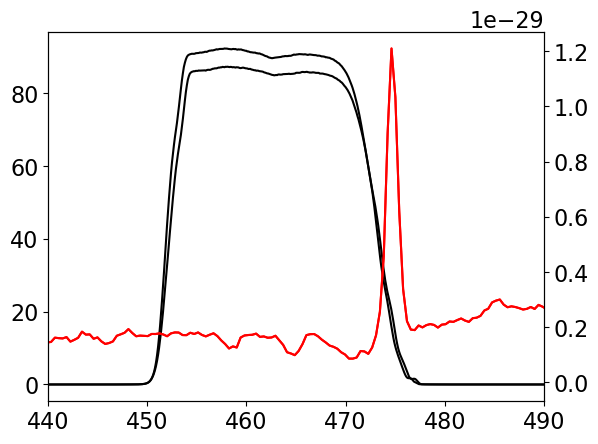

3 25.665248313976164
3 25.75333556303265


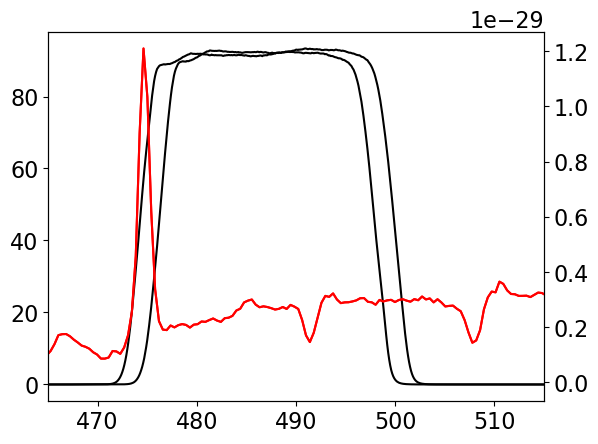

3 26.281959805246217
3 26.080105269455586


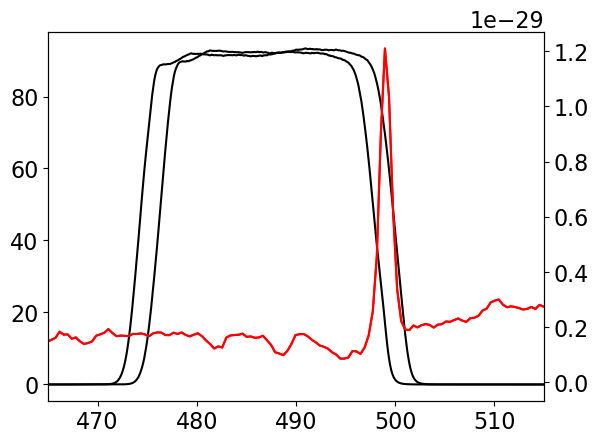

In [55]:
zs = [2.3, 2.5, 2.7, 2.9, 3.1]
#zs = [3.1, 3.35, 3.55, 3.85, 4.15]

for ifilt in range(4):
    z1 = zs[ifilt]
    wl = lbgs[:,0]/10*(1+z1)
    fl = lbgs[:,1]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    print (ifilt, get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["30.5, 30.5"]  , wl, fl, plot=True, ax1=ax1, ax2=ax2))
    print (ifilt, get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["141.3, 141.3"], wl, fl, plot=True, ax1=ax1, ax2=ax2))
    plt.show()
    plt.close(fig)

    z2 = zs[ifilt+1]
    wl = lbgs[:,0]/10*(1+z2)
    fl = lbgs[:,1]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    print (ifilt, get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["30.5, 30.5"]  , wl, fl, plot=True, ax1=ax1, ax2=ax2))
    print (ifilt, get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt]["141.3, 141.3"], wl, fl, plot=True, ax1=ax1, ax2=ax2))
    plt.show()
    plt.close(fig)

In [56]:
pos=df.keys()[1:]
radi = np.array([
    np.sqrt(float(x)**2+float(y)**2) for s in pos for (x,y) in [s.split(",")]
])
idx = np.argsort(radi)
idx

array([ 0,  1,  5,  6,  2, 10,  7, 11,  3, 14, 12,  8, 15, 13, 16,  4, 17,
        9, 18])

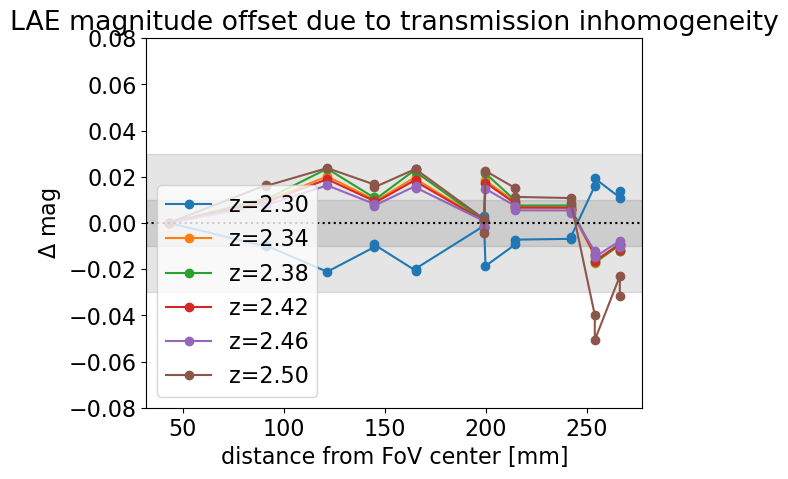

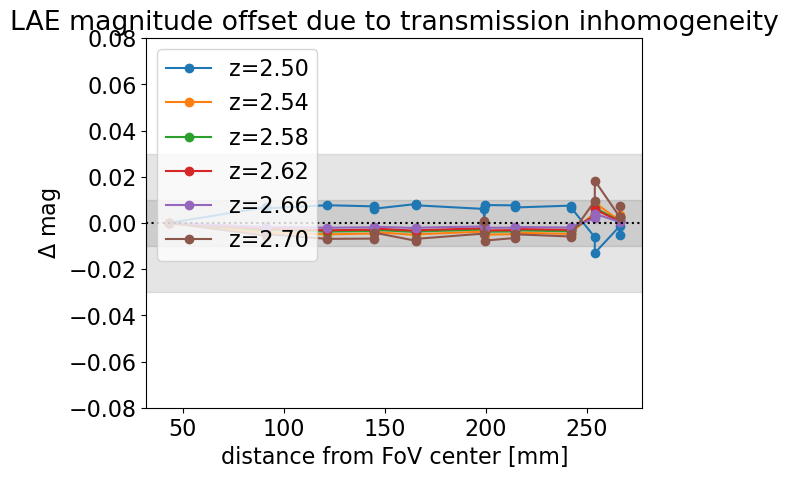

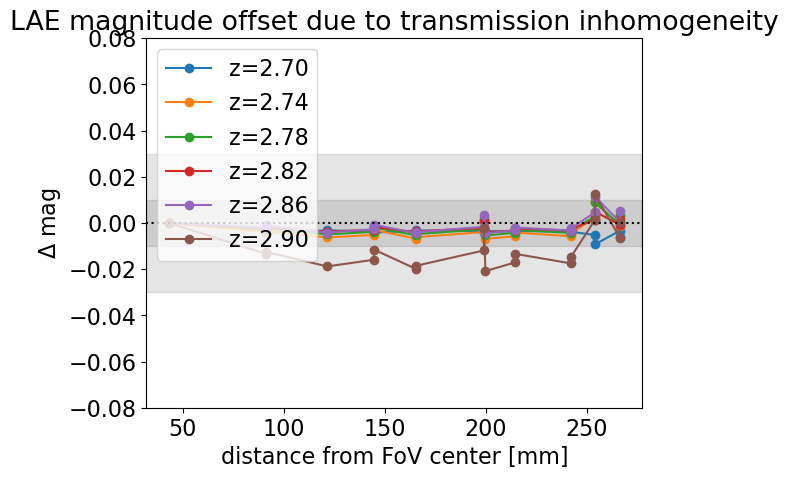

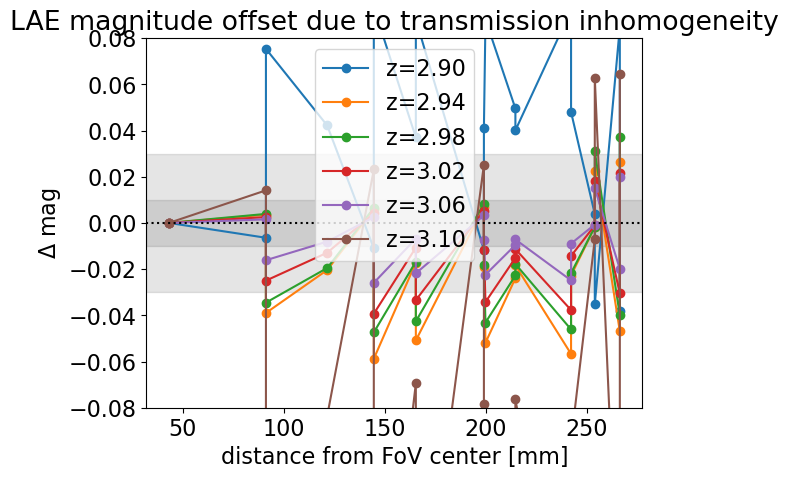

In [57]:
for ifilt in range(4):
    
    z1 = zs[ifilt]
    z2 = zs[ifilt+1]
    
    plt.clf()
    zarr = np.linspace(z1, z2, 6)

    for iz, z in enumerate(zarr):
        wl = lbgs[:,0]/10*(1+z)
        fl = lbgs[:,1]
        mags = []
        for ik, k in enumerate(pos[idx]):
            mag = get_mag(dfs[ifilt]["Wavelength"], dfs[ifilt][k], wl, fl, plot=False)
            mags.append(mag)
        plt.plot(radi[idx], mags-mags[0], "C%io-"%(iz%9), label="z=%.2f"%z)
    plt.legend()
    plt.title("LAE magnitude offset due to transmission inhomogeneity")
    plt.xlabel("distance from FoV center [mm]")
    plt.ylabel(r"$\Delta$ mag")
    plt.ylim(-0.08,0.08)
    plt.axhspan(ymin=-0.03, ymax=0.03, color="k", alpha=0.1)
    plt.axhspan(ymin=-0.01, ymax=0.01, color="k", alpha=0.1)
    plt.axhline(y=0, ls=":", color="k")
    plt.show()

# Maximum mag offset detection

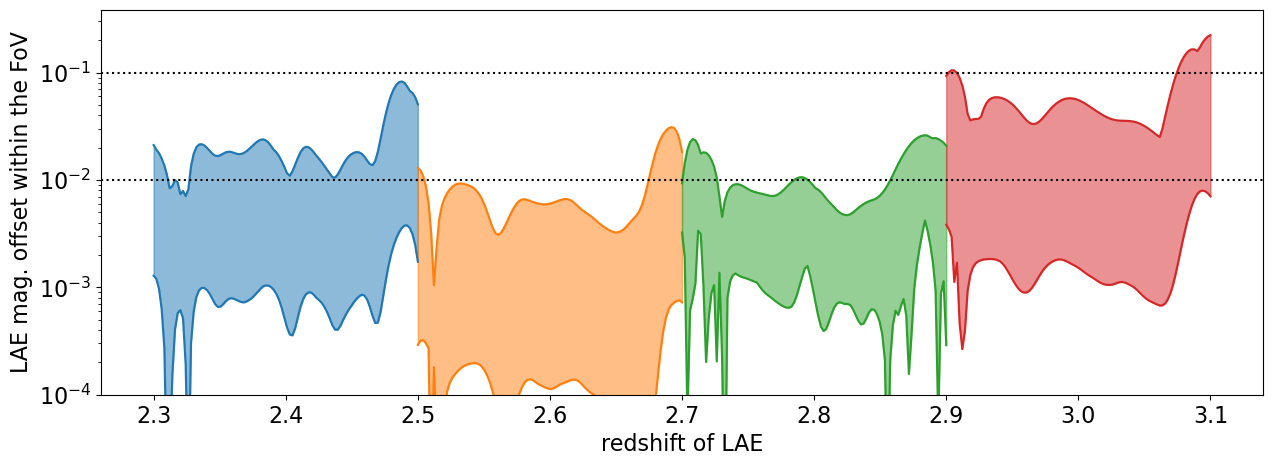

In [58]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(15,5))
for ifilt in range(4):
    z1 = zs[ifilt  ]
    z2 = zs[ifilt+1]
    z = np.linspace(z1, z2, 100)
    dmags_min, dmags_max = [], []
    for zz in z:
        wl = lbgs[:,0]/10*(1+zz)
        fl = lbgs[:,1]
        
        dmags = []
        for ik, k in enumerate(pos[idx]):
            ff = dfs[ifilt][k]
            dmag = get_mag(dfs[ifilt]["Wavelength"], ff, wl, fl, plot=False)
            #print (dmag)
            dmags.append(dmag)
        dmags = np.array(dmags)
        dmags -= dmags[0]
        dmags_min.append(np.abs(dmags[1:]).min())
        dmags_max.append(np.abs(dmags).max())
        
        
    plt.plot(z, dmags_min, "C%i-"%ifilt)
    plt.plot(z, dmags_max, "C%i-"%ifilt)
    plt.fill_between(z, dmags_min, dmags_max, color="C%i"%ifilt, alpha=0.5)
plt.yscale("log")
plt.axhline(y=0.1, color="k", ls=":")
plt.axhline(y=0.01, color="k", ls=":")
plt.ylabel("LAE mag. offset within the FoV")
plt.xlabel("redshift of LAE")
plt.ylim(ymin=1e-4)
plt.show()

## Spacial Distribution

In [59]:
def edges(c):
    c = np.asarray(c)
    mid = (c[:-1] + c[1:]) / 2
    first = c[0] - (c[1]-c[0]) / 2
    last  = c[-1] + (c[-1]-c[-2]) / 2
    return np.r_[first, mid, last]

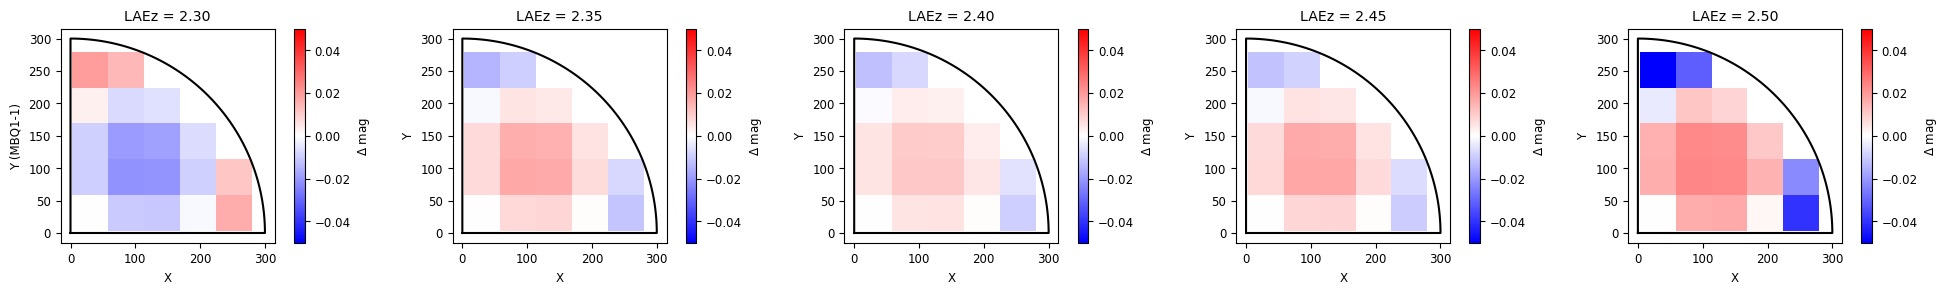

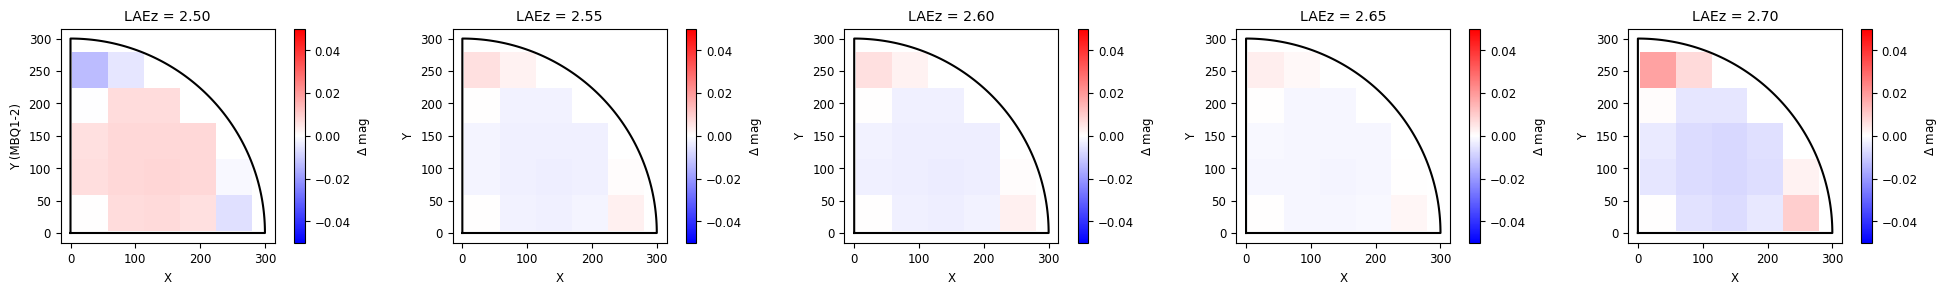

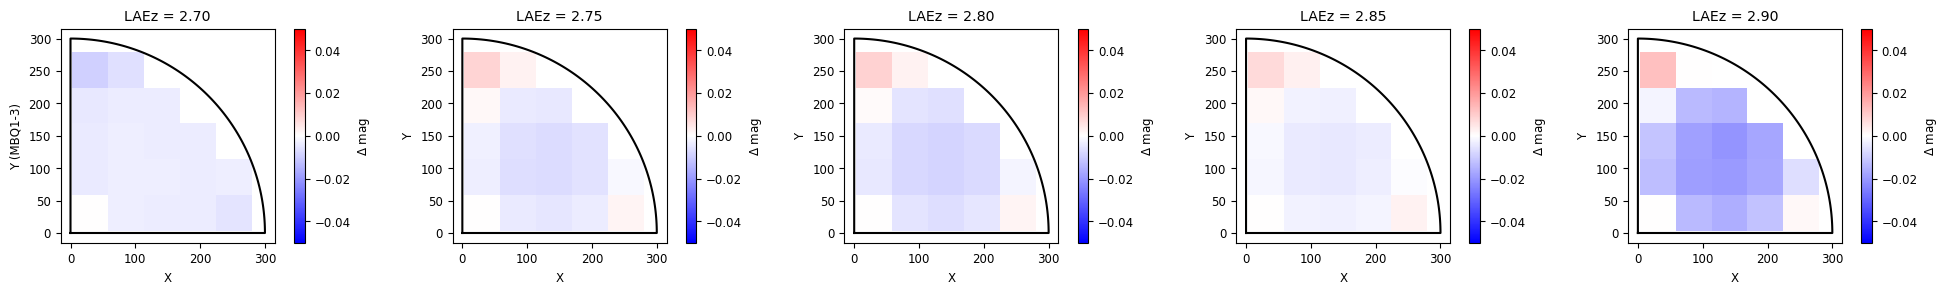

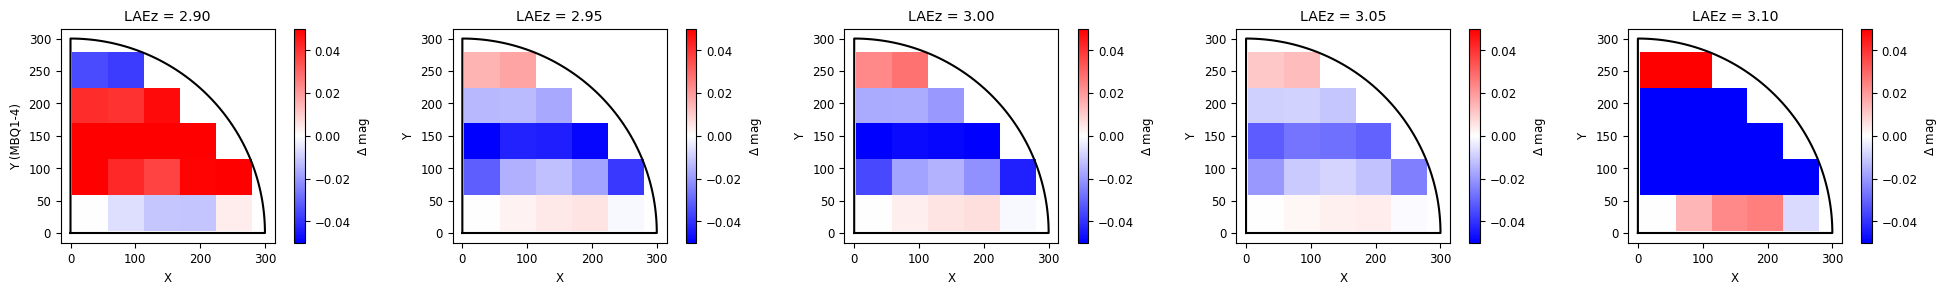

In [60]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 8.5})
t = np.linspace(0, np.pi/2, 100)
xc, yc = np.cos(t)*300, np.sin(t)*300.
xc = np.append([0], np.append(xc, [0]))
yc = np.append([0], np.append(yc, [0]))

for ifilt in range(4):
    
    plt.figure(figsize=(20,3))
    
    z1 = zs[ifilt  ]
    z2 = zs[ifilt+1]
    z = np.linspace(z1, z2, 5)
    dmags_min, dmags_max = [], []
    for iz, zz in enumerate(z):
        plt.subplot(1,5,iz+1, aspect=1.)
        wl = lbgs[:,0]/10*(1+zz)
        fl = lbgs[:,1]
        
        dmags = []
        xs, ys = [], []
        for ik, k in enumerate(pos[idx]):
            ff = dfs[ifilt][k]
            dmag = get_mag(dfs[ifilt]["Wavelength"], ff, wl, fl, plot=False)
            
            if ik==0:
                dmag0 = dmag
                dmag = 0
            else:
                dmag -= dmag0
            dmags.append(dmag)
                
            x, y = np.array(k.split(",")).astype(float)
            xs.append(x); ys.append(y)
            

        df = pd.DataFrame({'x': xs, 'y': ys, 'z': dmags})
        pv = df.pivot(index='y', columns='x', values='z').sort_index().sort_index(axis=1)
        xe = edges(pv.columns.values)
        ye = edges(pv.index.values)
        #vmax = np.amax(np.abs(dmags))
        #vmin = -vmax
        vmax = 0.05
        vmin = -0.05
        plt.pcolormesh(xe, ye, pv.values, shading='auto', cmap="bwr", vmin=vmin, vmax=vmax)
        plt.colorbar(label=r'$\Delta$ mag')
        plt.xlabel('X'); plt.ylabel('Y'); plt.tight_layout()
        plt.title("LAEz = %.2f"%zz)
        if iz == 0:
            plt.ylabel("Y (MBQ1-%i)"%(ifilt+1) )
        
        #plt.scatter(xs, ys, c=dmags, s=1300, marker="s")
        #plt.colorbar()
        plt.plot(xc, yc, "k-")
    plt.show()
        
        
#plt.yscale("log")
#plt.axhline(y=0.1, color="k", ls=":")
#plt.axhline(y=0.01, color="k", ls=":")
#plt.ylabel("LAE mag. offset within the FoV")
#plt.xlabel("redshift of LAE")
#plt.ylim(ymin=1e-4)
#plt.show()

# Basic statistics

In [61]:
for ifilt in range(4):
    print (f"ifilt={ifilt}")
    wl = dfs[ifilt]["Wavelength"]
    means = []
    for ik, k in enumerate(pos[idx]):
        ff = dfs[ifilt][k]

        mean_wl = np.dot(wl, ff)/np.sum(ff)
        if ik==0:
            mean_wl0 = mean_wl
        means.append(mean_wl)

        print (f"  pos={k:12s} mean={mean_wl:.2f}, delta mean={(mean_wl-mean_wl0):.2f}")
    means = np.array(means)
    mm = np.mean(means)
    print (mm, 2*np.std(means), means.max()-mm, mm-means.min())

ifilt=0
  pos=30.5, 30.5   mean=413.45, delta mean=0.00
  pos=85.9, 30.5   mean=413.09, delta mean=-0.35
  pos=30.5, 85.9   mean=413.10, delta mean=-0.34
  pos=85.9, 85.9   mean=412.68, delta mean=-0.76
  pos=141.3, 30.5  mean=413.08, delta mean=-0.37
  pos=30.5, 141.3  mean=413.12, delta mean=-0.32
  pos=141.3, 85.9  mean=412.69, delta mean=-0.75
  pos=85.9, 141.3  mean=412.73, delta mean=-0.72
  pos=196.7, 30.5  mean=413.41, delta mean=-0.03
  pos=30.5, 196.7  mean=413.51, delta mean=0.07
  pos=141.3, 141.3 mean=412.75, delta mean=-0.70
  pos=196.7, 85.9  mean=413.12, delta mean=-0.32
  pos=85.9, 196.7  mean=413.20, delta mean=-0.25
  pos=196.7, 141.3 mean=413.20, delta mean=-0.25
  pos=141.3, 196.7 mean=413.24, delta mean=-0.20
  pos=252.1, 30.5  mean=413.95, delta mean=0.50
  pos=30.5, 252.1  mean=414.07, delta mean=0.63
  pos=252.1, 85.9  mean=413.78, delta mean=0.34
  pos=85.9, 252.1  mean=413.87, delta mean=0.43
413.2658372124275 0.8254917878303875 0.8054444511072916 0.582434725

In [62]:
def original_transmission(lam, lam_b90, lam_r90, k=5.0):
    LOGIT_09 = np.log(0.9 / 0.1)  # ln(9) ≈ 2.197224
    """
    Analytic filter transmission as product of two sigmoids.
    
    Parameters
    ----------
    lam : array
        Wavelength [same unit as lam_b90, lam_r90].
    lam_b90 : float
        Wavelength where transmission is 90% on the blue side.
    lam_r90 : float
        Wavelength where transmission is 90% on the red side.
    k : float
        Steepness parameter (larger -> steeper edges).
    """
    # 50% points (from the 90% points)
    m_b = lam_b90 - LOGIT_09 / k
    m_r = lam_r90 + LOGIT_09 / k

    S_blue = 1.0 / (1.0 + np.exp(-k * (lam - m_b)))
    S_red  = 1.0 / (1.0 + np.exp( k * (lam - m_r)))
    
    return S_blue * S_red

In [65]:
# MBQ1
blue90 = [401.56, 427.44, 453.32, 479.20]
red90 = [425.12, 451.00, 476.88, 502.76]
cwl = [413.34, 439.20, 465.10, 490.98]
# MBQ2
#blue90 = [505.08, 530.96, 559.43, 594.16]
#red90  = [528.64, 556.32, 591.85, 628.64]
#cwl = [516.86, 543.63, 575.64, 611.40]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  


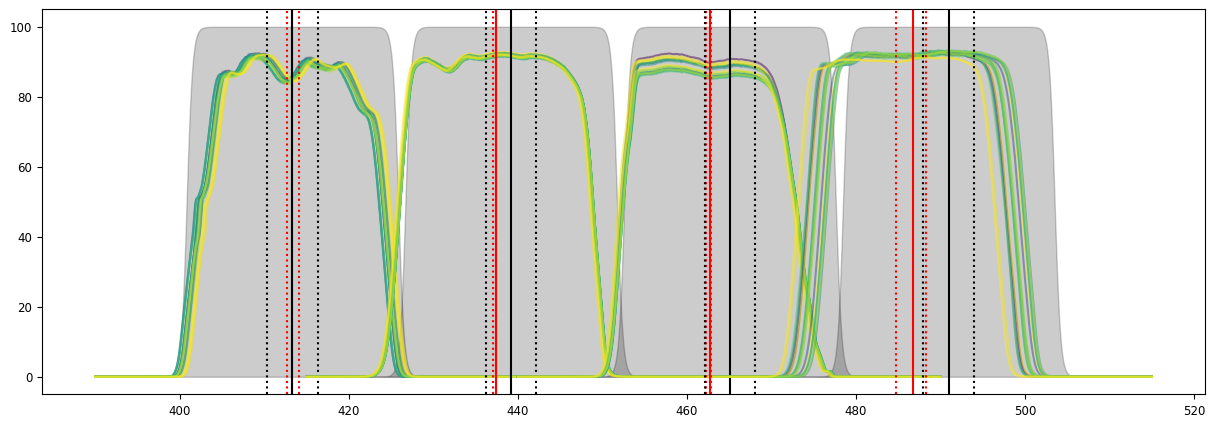

In [67]:
korg = 3

fig = plt.figure(figsize=(15,5))
for ifilt in range(4):
    df = pd.read_csv(flist[ifilt])
    for i, k in enumerate(df.keys()[1:]):
        dist = k2dist(k)
        plt.plot(df["Wavelength"], df[k], "r-", alpha=0.5, color=cmap(norm(dist)))
    #plt.fill_between(df["Wavelength"], df["30.5, 30.5"], color="k", alpha=0.2)
    
    tr = 100*original_transmission(df["Wavelength"], blue90[ifilt], red90[ifilt], k=korg)
    plt.fill_between(df["Wavelength"], tr, color="k", alpha=0.2)
    
    
    # CWL
    wl = dfs[ifilt]["Wavelength"]
    means = []
    for ik, k in enumerate(pos[idx]):
        ff = dfs[ifilt][k]

        mean_wl = np.dot(wl, ff)/np.sum(ff)
        if ik==0:
            mean_wl0 = mean_wl
        means.append(mean_wl)

    means = np.array(means)
    mm = np.mean(means)
    plt.axvline(x=mm, color="r", ls="-")
    plt.axvline(x=means.min(), color="r", ls=":")
    plt.axvline(x=means.max(), color="r", ls=":")
    plt.axvline(x=cwl[ifilt], color="k", ls="-")
    plt.axvline(x=cwl[ifilt]-3, color="k", ls=":")
    plt.axvline(x=cwl[ifilt]+3, color="k", ls=":")
    
    
    
#plt.axvline(x=557.4, color="b")
#plt.axvline(x=558.2, color="b")
#plt.axvline(x=630.0, color="b")

plt.show()